In [13]:
library(tidyverse)
library(gtools)
library(tibble)
library(dplyr)
library(psy)
library(nFactors)

In [12]:
install.packages("psy")

package 'psy' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sam Cannon\AppData\Local\Temp\Rtmp65zDqo\downloaded_packages


Now I am going to get cronbach's alpha for items

In [3]:
getwd()

[1] "C:/Users/Sam Cannon/Desktop/Python/SIOP 2020"

In [ ]:
setwd()

In [5]:
data <- read.csv("factor_analysis_data.csv", header = TRUE)

Learning Alpha

In [15]:
cronbach(data[, 2:11])

$sample.size
[1] 295

$number.of.items
[1] 10

$alpha
[1] 0.9180813

Belonging and Authenticity Alpha

In [18]:
cronbach(data[, 12:27])

$sample.size
[1] 295

$number.of.items
[1] 16

$alpha
[1] 0.9758603

Turnover Alpha

In [22]:
cronbach(data[, 28:30])

$sample.size
[1] 295

$number.of.items
[1] 3

$alpha
[1] 0.911591

Factor Analysis with 3 Factors

Maximum Likelihood Factor Analysis
entering raw data and extracting 3 factors,
with varimax rotation

In [27]:
data <- data[, 2:30]

In [29]:
head(data)

Learning_1,Learning_2,Learning_3,Learning_4,Learning_5,Learning_6,Learning_7,Learning_8,Learn_1,Learn_2,...,Auth_2,Auth_3,Auth_4,Auth_5,Auth_6,Auth_7,Auth_8,Turnover_1,Turnover_2,Turnover_3
2,1,2,2,2,2,2,1,6,6,...,4,4,4,3,3,3,3,1,1,1
3,2,2,3,3,3,3,3,2,2,...,1,1,1,2,2,1,1,5,5,5
4,4,4,4,4,4,4,4,5,5,...,4,4,4,4,4,4,4,1,3,2
4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,2,2,2
3,3,3,3,3,3,3,3,6,6,...,4,4,4,4,4,4,4,2,2,2
3,3,3,3,3,3,3,3,6,6,...,4,4,4,4,4,4,4,4,4,4



Call:
factanal(x = data, factors = 3)

Uniquenesses:
Learning_1 Learning_2 Learning_3 Learning_4 Learning_5 Learning_6 Learning_7 
      0.29       0.20       0.19       0.23       0.25       0.17       0.20 
Learning_8    Learn_1    Learn_2   Belong_1   Belong_2   Belong_3   Belong_4 
      0.25       0.81       0.83       0.22       0.17       0.21       0.33 
  Belong_5   Belong_6   Belong_7   Belong_8     Auth_1     Auth_2     Auth_3 
      0.28       0.25       0.28       0.28       0.25       0.24       0.25 
    Auth_4     Auth_5     Auth_6     Auth_7     Auth_8 Turnover_1 Turnover_2 
      0.24       0.15       0.09       0.06       0.10       0.63       0.73 
Turnover_3 
      0.74 

Loadings:
           Factor1 Factor2 Factor3
Belong_1    0.80            0.37  
Belong_2    0.86                  
Belong_3    0.82            0.30  
Belong_4    0.77                  
Belong_5    0.78            0.30  
Belong_6    0.82                  
Belong_7    0.80                  
Belong_

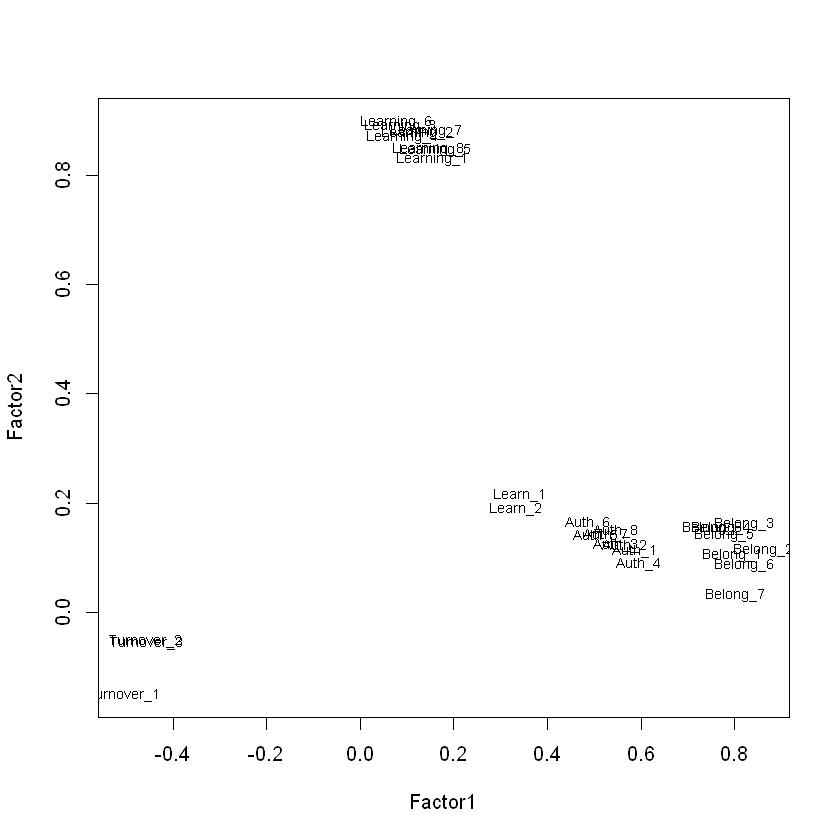

In [28]:
fit <- factanal(data, 3)
print(fit, digits=2, cutoff=.3, sort=TRUE)
# plot factor 1 by factor 2
load <- fit$loadings[,1:2]
plot(load,type="n") # set up plot
text(load,labels=names(data),cex=.7) # add variable names

How Many factors should we use then?

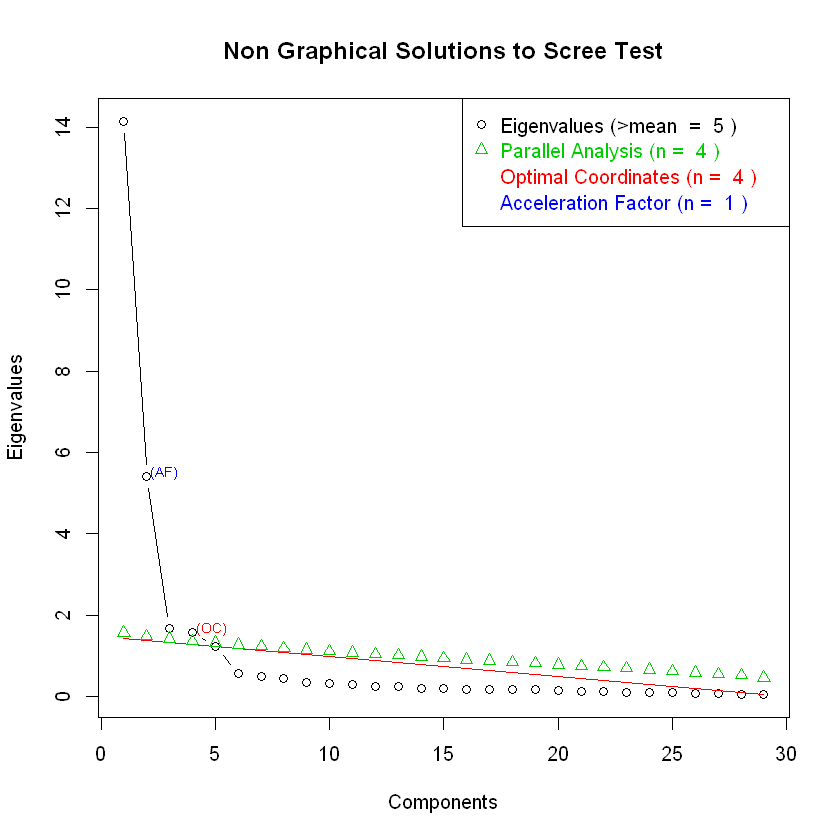

In [35]:
ev <- eigen(cor(data)) # get eigenvalues
ap <- parallel(subject=nrow(data),var=ncol(data),
  rep=100,cent=.05)
nS <- nScree(x=ev$values, aparallel=ap$eigen$qevpea)
plotnScree(nS)